In [17]:
from Bio import SeqIO
import pandas as pd
import numpy as np
from tqdm import tqdm
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [18]:
SPEC = "cotton"

In [19]:
def lower_collect(seq):
    temp = []
    for s in seq:
        if s.islower(): temp.append(s)
    return temp

In [26]:
raw_data = {}
with open(f"./{SPEC}_validate/{SPEC}.LTR.LTR.fasta", "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        if len(record.id) < 4:
            raw_data[record.id] = []
        
with open(f"./{SPEC}_validate/{SPEC}.LTR.LTR.fasta", "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        if len(record.id) < 4: 
            # raw_data[record.id] += lower_collect(record.seq)
            raw_data[record.id] += str(record.seq).lower()
data = {}
for k in raw_data.keys():
    data[k] = "".join(raw_data[k])

del raw_data

In [27]:
data.keys()

dict_keys(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13'])

In [28]:
try:
    #del data[""]
    #del data["co"]
    del data["com"]
except: pass

In [29]:
data.keys()

dict_keys(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13'])

In [30]:
def signal_generator(seq):
    #signal = {"A":[], "T":[], "G":[], "C":[]}
    signal = []
    # A: 135.13 T: 126.115 G: 151.13 C: 111.10
    properties = [135.13, 126.115, 151.13, 111.10]
    # properties = [2, 2, 3, 3]
    weight = {"a": (properties[0] - np.mean(properties))/np.std(properties), "t": (properties[1] - np.mean(properties))/np.std(properties), \
              "g": (properties[2] - np.mean(properties))/np.std(properties), "c": (properties[3] - np.mean(properties))/np.std(properties), "N": 0}
    #for k in signal.keys():
    #    for s in seq:
    #        if s == k: signal[k].append(10)
    #        else: signal[k].append(-10)
    # weight = {"a":1, "t": -1, "g": 1j, "c": -1j, "N": 0}
    for s in seq:
        signal.append(weight[s])
    return signal

In [31]:
signal_data = {}
for k in tqdm(data.keys()):
    signal_data[k] = signal_generator(data[k])

100%|██████████| 26/26 [00:07<00:00,  3.64it/s]


In [32]:
#from multiprocessing import Process, Queue

fft_vector = {}
N = int(np.max([len(d) for d in data.values()]))

for k in tqdm(data.keys()):
    #fft_vector[k] = abs(np.fft.fft(signal_data[k]["A"], N) / len(signal_data[k]["A"])) + abs(np.fft.fft(signal_data[k]["T"], N) / len(signal_data[k]["T"])) + abs(np.fft.fft(signal_data[k]["G"], N) / len(signal_data[k]["G"])) + abs(np.fft.fft(signal_data[k]["C"], N) / len(signal_data[k]["C"]))
    fft_vector[k] = abs(np.fft.fft(signal_data[k], N, norm="ortho")) #/ len(signal_data[k]))

"""def work(k, N, result):
    result.put(abs(np.fft.fft(signal_data[k], N) / len(signal_data[k])))
    return

p = []
result = Queue()
for i in range(len(data.keys())):
    p.append(Process(target=work, args=(list(signal_data.keys())[i], N, result)))
for i in range(len(data.keys())):
    p[i].start()
for i in range(len(data.keys())):
    p[i].join()
result.put("stop")
print("Calculation ended")

fft_vector = {}
cnt = 0
while True:
    tmp = result.get()
    print(f"appending {i} result")
    if tmp == "stop":
        cnt+=1
        break
    else:
        fft_vector[list(signal_data.keys())[cnt]] = tmp
        cnt+=1"""

100%|██████████| 26/26 [00:51<00:00,  1.99s/it]


'def work(k, N, result):\n    result.put(abs(np.fft.fft(signal_data[k], N) / len(signal_data[k])))\n    return\n\np = []\nresult = Queue()\nfor i in range(len(data.keys())):\n    p.append(Process(target=work, args=(list(signal_data.keys())[i], N, result)))\nfor i in range(len(data.keys())):\n    p[i].start()\nfor i in range(len(data.keys())):\n    p[i].join()\nresult.put("stop")\nprint("Calculation ended")\n\nfft_vector = {}\ncnt = 0\nwhile True:\n    tmp = result.get()\n    print(f"appending {i} result")\n    if tmp == "stop":\n        cnt+=1\n        break\n    else:\n        fft_vector[list(signal_data.keys())[cnt]] = tmp\n        cnt+=1'

In [33]:
df = pd.DataFrame(fft_vector)
# df = df[df >= df.quantile(1e-7)]
# df.fillna(0, inplace=True)
df = df[N//4:3*(N//4)]
df

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13
1190048,0.755676,0.318356,1.042501,0.887821,0.493943,0.908315,0.844052,0.677799,0.328778,1.379926,...,0.239449,0.517989,0.210535,0.821991,0.452192,0.071317,0.231214,0.450879,0.501274,0.281599
1190049,0.205810,0.946798,0.664997,0.612744,0.986693,1.159077,0.535231,0.540811,0.103373,0.382304,...,0.211217,0.384498,0.138797,1.149041,0.642811,0.285636,0.272449,0.396293,0.775375,0.157008
1190050,1.071595,0.946210,0.536728,0.567882,0.614667,0.269793,0.798304,1.446917,0.363400,1.135985,...,0.099605,0.221494,0.172194,1.178772,0.486511,0.401276,0.354799,0.422688,0.833328,0.128884
1190051,0.210746,0.439892,0.484102,0.398777,0.556321,0.709474,0.081657,0.924998,0.059753,0.688762,...,0.472698,0.081518,0.231991,0.958298,0.116582,0.394050,0.309484,0.592908,0.618549,0.382103
1190052,0.276887,0.778052,0.282867,0.966042,0.367428,0.837597,0.129541,0.774416,0.394610,0.186898,...,0.659423,0.091508,0.223074,0.753760,0.422030,0.335368,0.349866,0.742364,0.334916,0.477289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570139,0.410038,0.863137,0.646648,0.597174,1.245206,0.206477,0.636496,0.625443,0.182484,1.289984,...,0.559266,0.084949,0.269235,0.696865,0.537471,0.322724,0.519948,0.737545,0.275193,0.298071
3570140,0.276887,0.778052,0.282867,0.966042,0.367428,0.837597,0.129541,0.774416,0.394610,0.186898,...,0.659423,0.091508,0.223074,0.753760,0.422030,0.335368,0.349866,0.742364,0.334916,0.477289
3570141,0.210746,0.439892,0.484102,0.398777,0.556321,0.709474,0.081657,0.924998,0.059753,0.688762,...,0.472698,0.081518,0.231991,0.958298,0.116582,0.394050,0.309484,0.592908,0.618549,0.382103
3570142,1.071595,0.946210,0.536728,0.567882,0.614667,0.269793,0.798304,1.446917,0.363400,1.135985,...,0.099605,0.221494,0.172194,1.178772,0.486511,0.401276,0.354799,0.422688,0.833328,0.128884


Linkage map calculation ended
[[1.90000000e+01 2.10000000e+01 4.45175842e+02 2.00000000e+00]
 [2.40000000e+01 2.60000000e+01 4.56954716e+02 3.00000000e+00]
 [1.50000000e+01 2.70000000e+01 4.60366714e+02 4.00000000e+00]
 [1.60000000e+01 2.80000000e+01 4.67146569e+02 5.00000000e+00]
 [1.70000000e+01 2.90000000e+01 4.80521114e+02 6.00000000e+00]
 [2.00000000e+01 3.00000000e+01 4.87221635e+02 7.00000000e+00]
 [2.50000000e+01 3.10000000e+01 4.93423741e+02 8.00000000e+00]
 [1.80000000e+01 3.20000000e+01 4.93538486e+02 9.00000000e+00]
 [1.30000000e+01 3.30000000e+01 4.98783169e+02 1.00000000e+01]
 [2.20000000e+01 3.40000000e+01 5.02661082e+02 1.10000000e+01]
 [2.30000000e+01 3.50000000e+01 5.05981520e+02 1.20000000e+01]
 [1.40000000e+01 3.60000000e+01 5.16567558e+02 1.30000000e+01]
 [4.00000000e+00 8.00000000e+00 6.53196552e+02 2.00000000e+00]
 [6.00000000e+00 3.80000000e+01 6.68594127e+02 3.00000000e+00]
 [3.00000000e+00 3.90000000e+01 6.73585838e+02 4.00000000e+00]
 [1.10000000e+01 4.000000

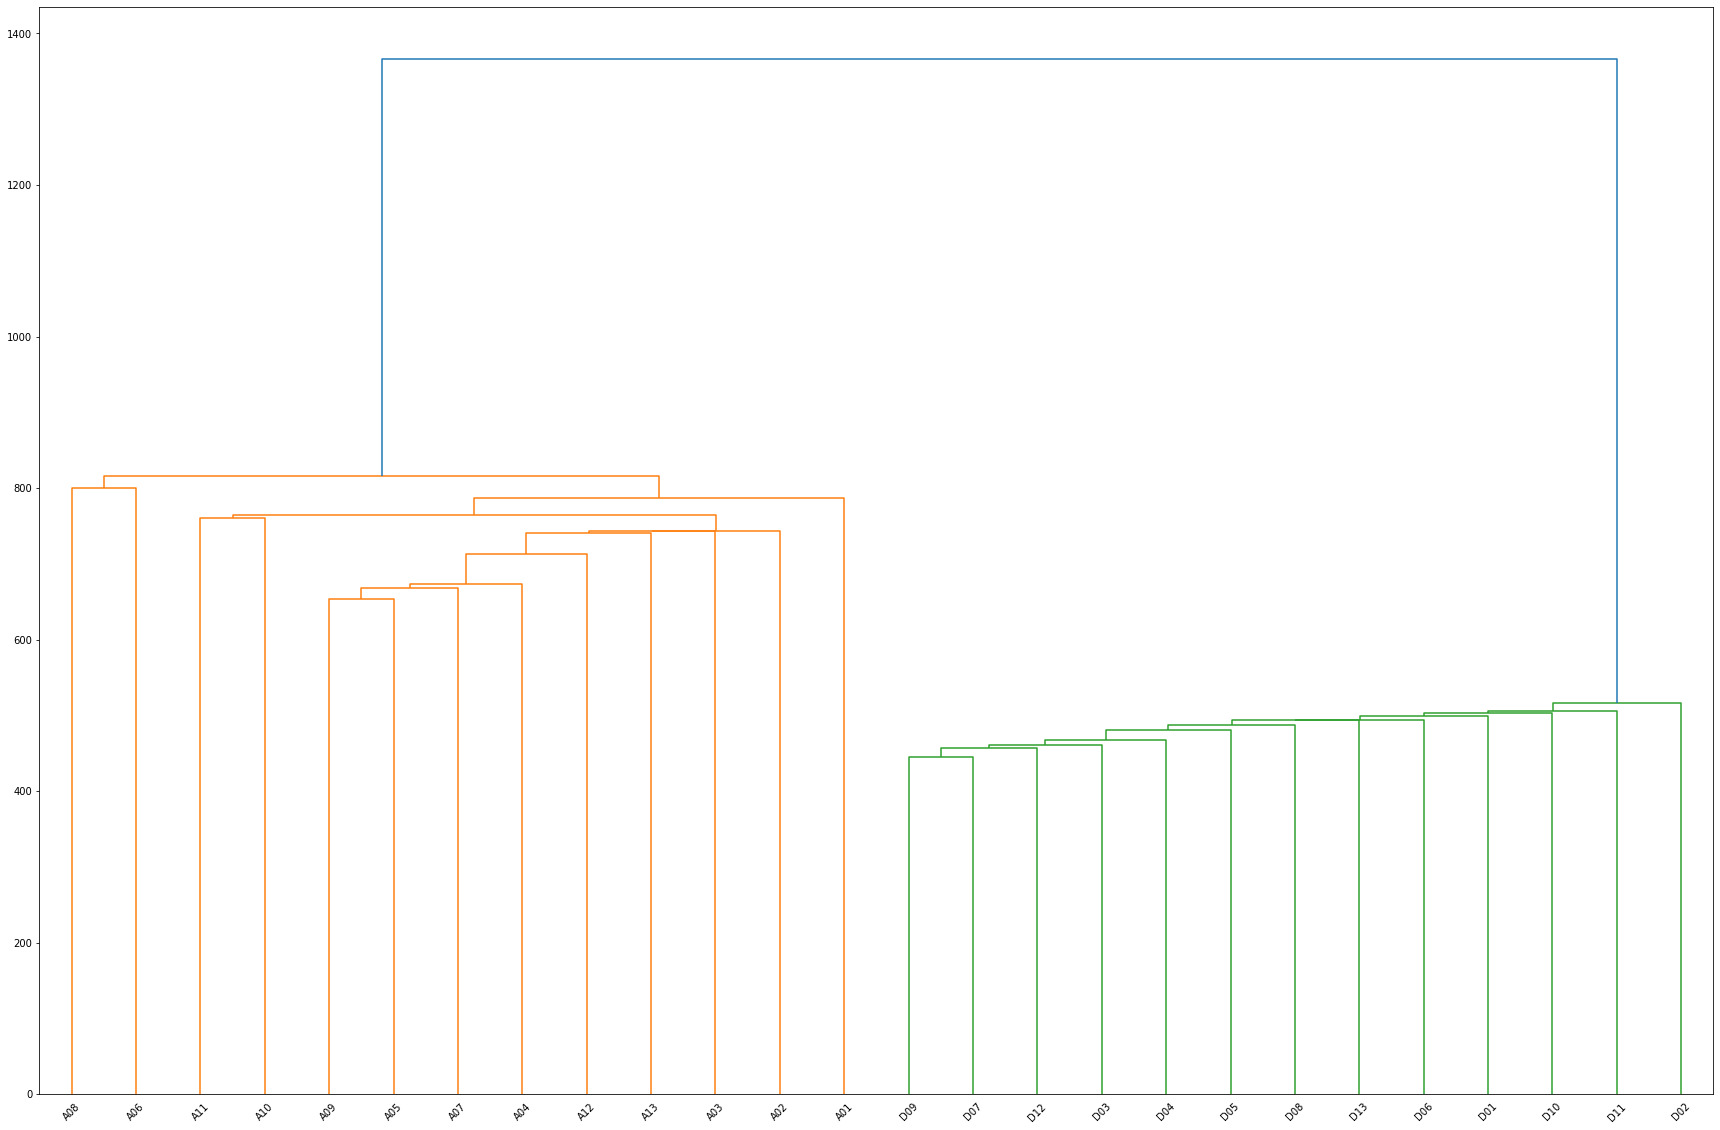

In [35]:
plt.figure(figsize=(30, 20))
linked = linkage(df.T, method="ward")
print("Linkage map calculation ended")
dend = dendrogram(linked, orientation='top', distance_sort='descending', \
                  labels=list(df.T.index), show_leaf_counts=True)

plt.savefig(f"./{SPEC}_dendrogram.png")

In [13]:
!pip install fastcluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 2.0 MB/s eta 0:00:00a 0:00:01


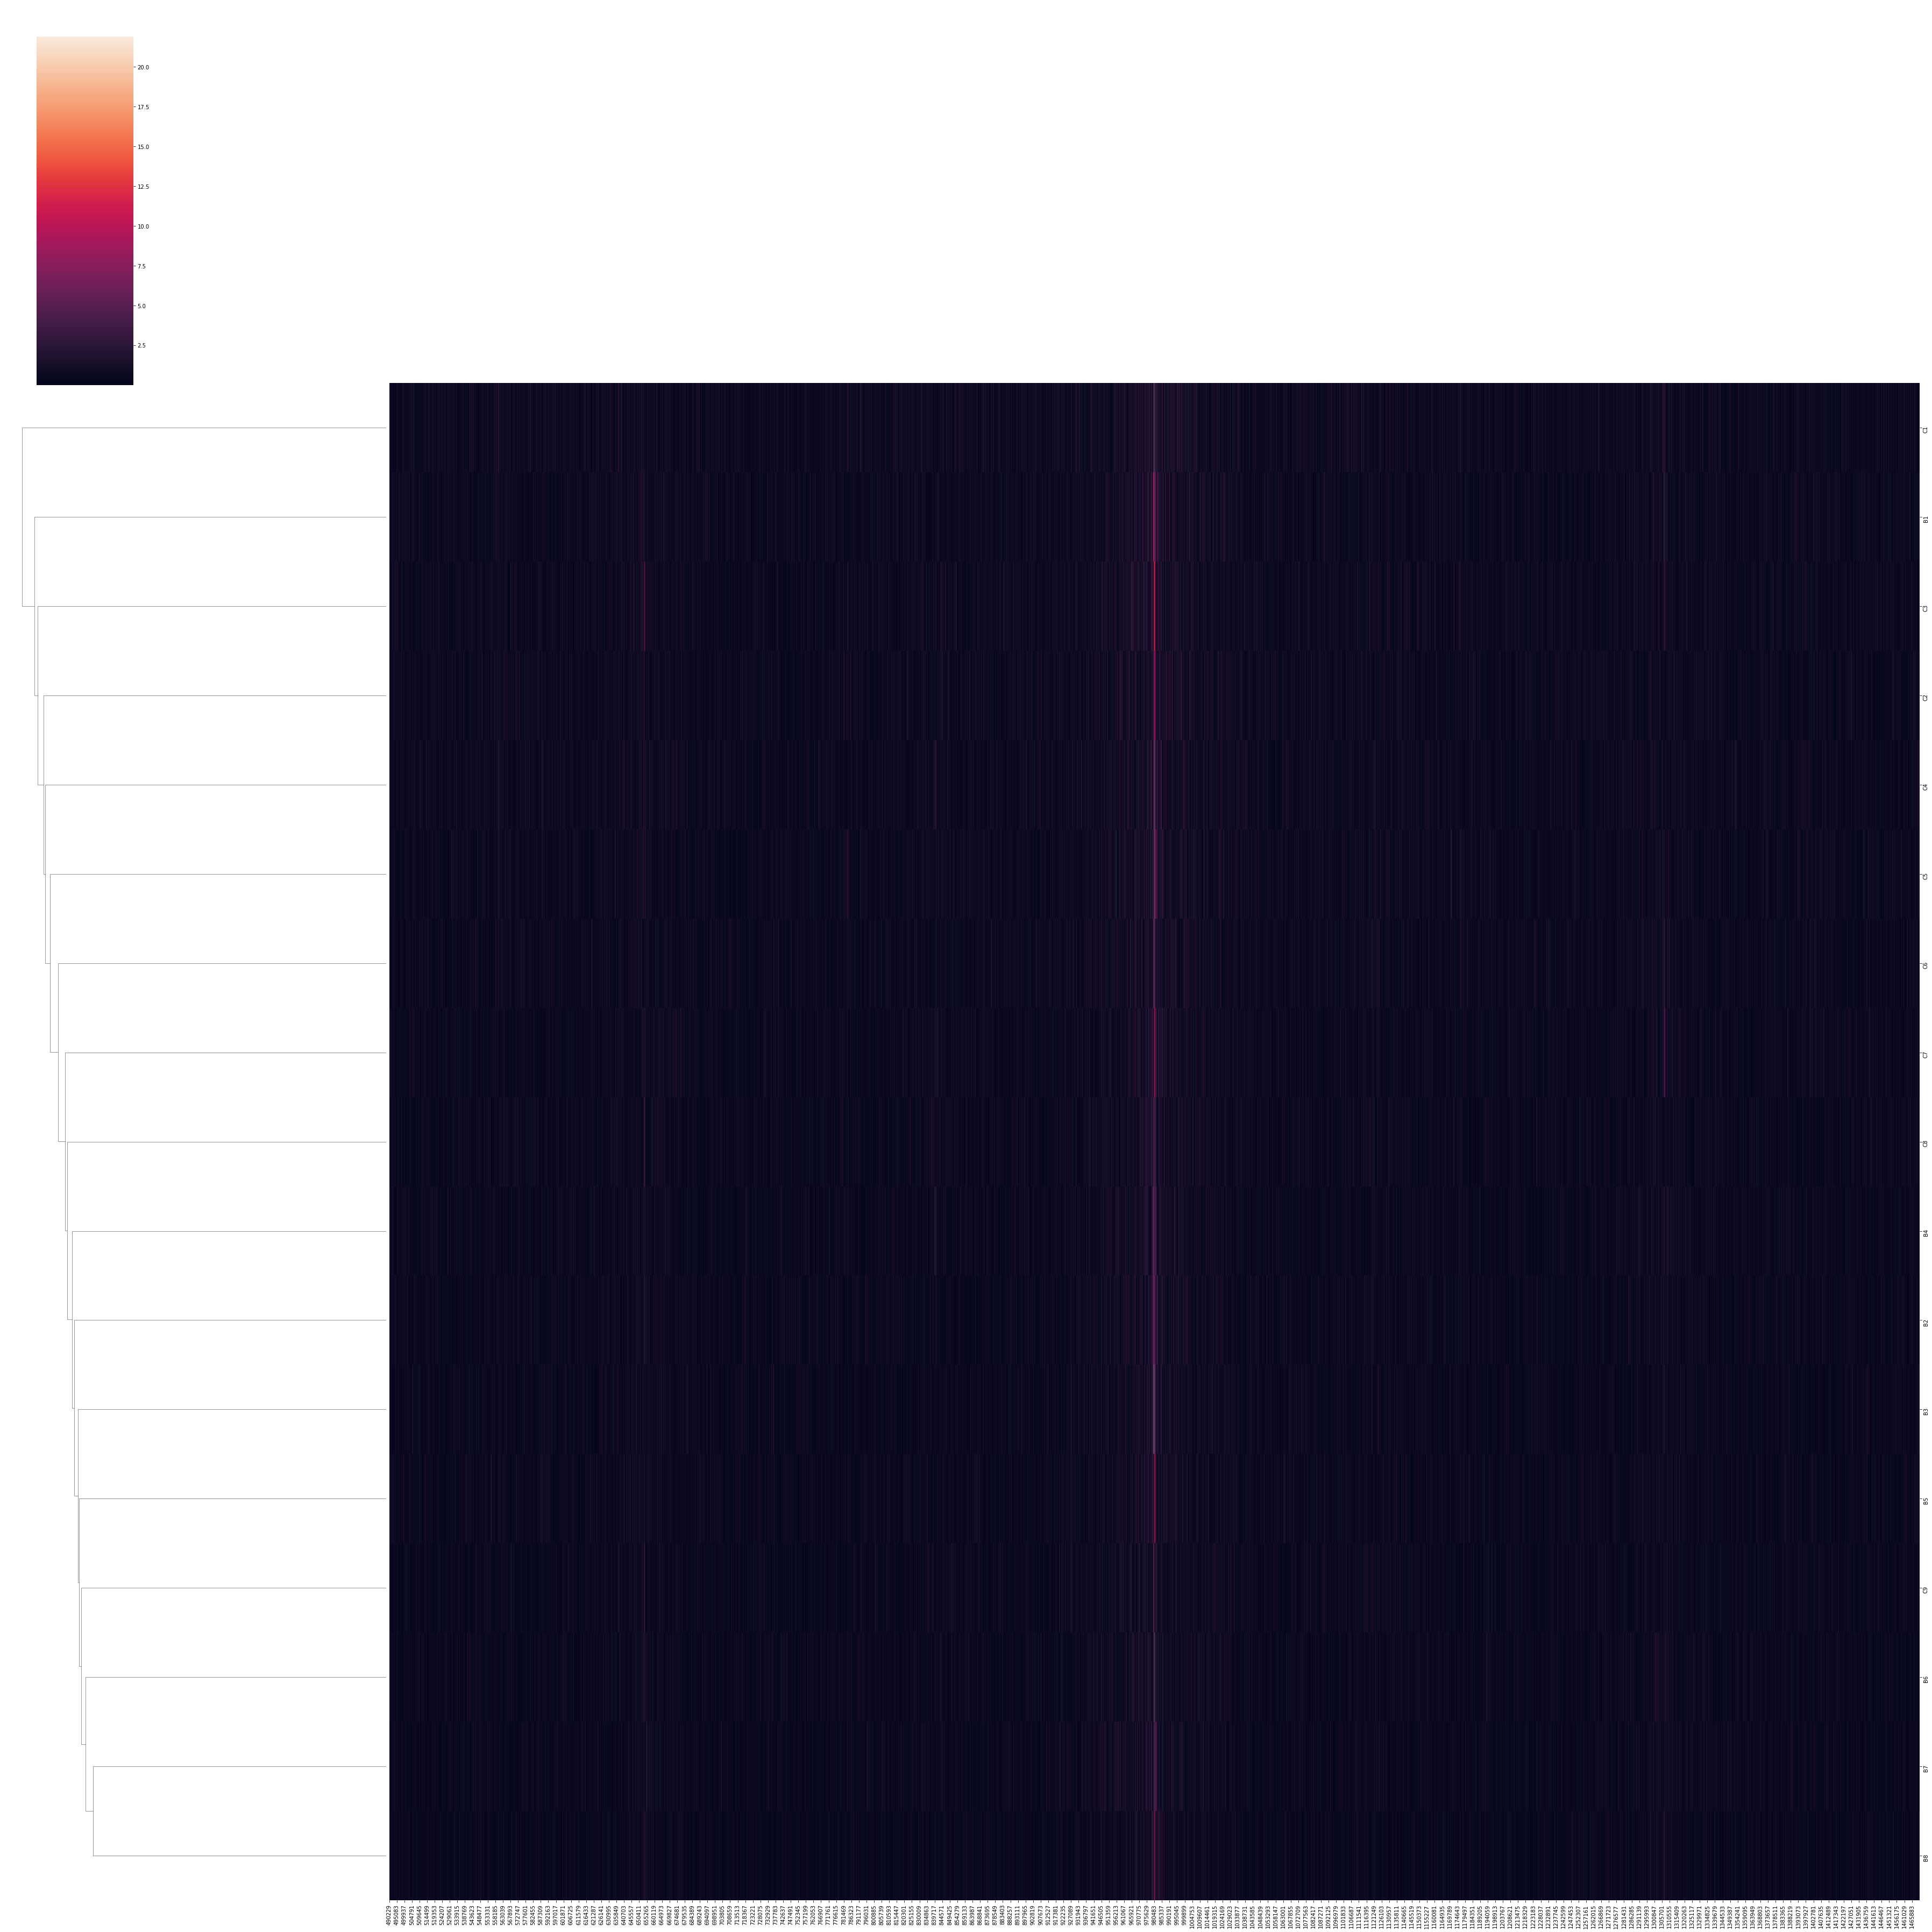

In [14]:
import seaborn as sns
sns.clustermap(df.T, col_cluster=False, yticklabels=True, figsize=(50,50))
plt.savefig(f"./{SPEC}_clustermap.png")